In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

In [112]:
df=pd.read_csv('/content/covid_19_clean_complete.csv')

In [113]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [114]:
df.isnull().sum().sum()

np.int64(34404)

In [115]:
df.duplicated().sum()

np.int64(0)

In [116]:
df.shape

(49068, 10)

In [117]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [118]:
df['Province/State']=df['Province/State'].fillna('All')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  49068 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [120]:
df['Date']=pd.to_datetime(df['Date'])

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  49068 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [122]:
global_daily= df.groupby('Date')[['Confirmed','Deaths','Recovered']].sum().reset_index()

In [123]:
global_daily.head()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555,17,28
1,2020-01-23,654,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52


In [124]:
global_daily.describe()

,Date,Confirmed,Deaths,Recovered
count,188,1.880000e+02,188.000000,1.880000e+02
mean,2020-04-24 12:00:00,4.406960e+06,230770.760638,2.066001e+06
min,2020-01-22 00:00:00,5.550000e+02,17.000000,2.800000e+01
25%,2020-03-08 18:00:00,1.121910e+05,3935.000000,6.044125e+04
50%,2020-04-24 12:00:00,2.848733e+06,204190.000000,7.847840e+05
75%,2020-06-10 06:00:00,7.422046e+06,418634.500000,3.416396e+06
max,2020-07-27 00:00:00,1.648048e+07,654036.000000,9.468087e+06
std,NaN,4.757988e+06,217929.094183,2.627976e+06


##india-specific daily

In [125]:
india_df=df[df['Country/Region'].str.lower().str.contains('india')]
india_daily= india_df.groupby('Date')[['Confirmed','Deaths','Recovered']].sum().reset_index()

In [126]:
print('global daily data', global_daily.head())


global daily data         Date  Confirmed  Deaths  Recovered
0 2020-01-22        555      17         28
1 2020-01-23        654      18         30
2 2020-01-24        941      26         36
3 2020-01-25       1434      42         39
4 2020-01-26       2118      56         52


In [127]:
print('india daily data', india_daily.head())

india daily data         Date  Confirmed  Deaths  Recovered
0 2020-01-22          0       0          0
1 2020-01-23          0       0          0
2 2020-01-24          0       0          0
3 2020-01-25          0       0          0
4 2020-01-26          0       0          0


In [146]:
df['Date'].value_counts()

,count
Date,
2020-01-22,1
2020-01-23,1
2020-01-24,1
2020-01-25,1
2020-01-26,1
...,...
2020-07-23,1
2020-07-24,1
2020-07-25,1


In [128]:
df['Confirmed'].value_counts()

,count
Confirmed,
0,10059
1,1209
18,549
3,530
11,502
...,...
20619,1
30200,1
40481,1


In [129]:
df['Province/State'].value_counts()

,count
Province/State,
All,34404
Australian Capital Territory,188
New South Wales,188
Northern Territory,188
Queensland,188
...,...
Anguilla,188
British Virgin Islands,188
Turks and Caicos Islands,188


##Step 2: daily new cases, rolling averages and rates
- add daily new cases for global data

In [130]:
global_daily['NewConfirmed']=global_daily['Confirmed'].diff().fillna(global_daily['Confirmed'])
global_daily['NewDeaths']=global_daily['Deaths'].diff().fillna(global_daily['Deaths'])
global_daily['NewRecovered']=global_daily['Recovered'].diff().fillna(global_daily['Recovered'])

##add daily new cases for india data

In [131]:
india_daily['NewConfirmed']=india_daily['Confirmed'].diff().fillna(india_daily['Confirmed'])
india_daily['NewDeaths']=india_daily['Deaths'].diff().fillna(india_daily['Deaths'])
india_daily['Recovered']=india_daily['Recovered'].diff().fillna(india_daily['Recovered'])

##7-days rolling averages + rates

In [132]:
for df in [global_daily, india_daily]:
  df['NewConfirmed_7d']=df['NewConfirmed'].rolling(7, min_periods=1).mean()

  if 'NewRecovered' in df.columns:
    df['NewRecovered_7d']=df['NewRecovered'].rolling(7, min_periods=1).mean()
  else:
    df['NewRecovered_7d']=df['Recovered'].rolling(7,min_periods=1).mean()

  df['CFR']=(df['Deaths']/df['Confirmed']).replace([np.inf, -np.inf],np.nan).fillna(0)

  df['RecoveryRate']=(df['Recovered']/df['Confirmed']).replace([np.inf,-np.inf], np.nan).fillna(0)

In [133]:
print('global daily data',global_daily.tail())

global daily data           Date  Confirmed  Deaths  Recovered  NewConfirmed  NewDeaths  \
183 2020-07-23   15510481  633506    8710969      282756.0     9966.0   
184 2020-07-24   15791645  639650    8939705      281164.0     6144.0   
185 2020-07-25   16047190  644517    9158743      255545.0     4867.0   
186 2020-07-26   16251796  648621    9293464      204606.0     4104.0   
187 2020-07-27   16480485  654036    9468087      228689.0     5415.0   

     NewRecovered  NewConfirmed_7d  NewRecovered_7d       CFR  RecoveryRate  
183      169714.0    242565.142857    153818.285714  0.040844      0.561618  
184      228736.0    248154.571429    163706.428571  0.040506      0.566103  
185      219038.0    250713.142857    173456.142857  0.040164      0.570738  
186      134721.0    249278.714286    180175.571429  0.039911      0.571842  
187      174623.0    252408.857143    182472.857143  0.039685      0.574503  


In [134]:
print('india daily data', india_daily.tail())

india daily data           Date  Confirmed  Deaths  Recovered  NewConfirmed  NewDeaths  \
183 2020-07-23    1288108   30601    34602.0       49310.0      740.0   
184 2020-07-24    1337024   31358    32223.0       48916.0      757.0   
185 2020-07-25    1385635   32060    36141.0       48611.0      702.0   
186 2020-07-26    1435616   32771    31995.0       49981.0      711.0   
187 2020-07-27    1480073   33408    33598.0       44457.0      637.0   

     NewConfirmed_7d  NewRecovered_7d       CFR  RecoveryRate  
183     40610.857143     25921.714286  0.023757      0.026863  
184     42562.857143     27954.428571  0.023454      0.024101  
185     43979.142857     29735.714286  0.023137      0.026083  
186     45344.285714     31068.714286  0.022827      0.022287  
187     46390.714286     32369.714286  0.022572      0.022700  


##visualization ofcummulative and daily trends

In [135]:
import plotly.graph_objects as go
import plotly.express as px
from prophet import Prophet

##Global Trend Visualization

In [136]:
fig=px.line(
    global_daily,
    x='Date',
    y=['Confirmed','Deaths','Recovered'],
    title='global covid-19 trend'
)
fig.show()

##india cummulative cases

In [137]:
fig= px.line(
    india_daily,
    x='Date',
    y=['Confirmed','Deaths','Recovered'],
    title='india covid-19 trend'
)
fig.show()

##Global daily new cases with 7-day rolling avg

In [203]:
fig=go.Figure()
fig.add_trace(go.Bar(x=global_daily.index, y=global_daily['NewConfirmed'], name='daily new cases', marker_color='orange'))
fig.add_trace(go.Scatter(x=global_daily.index, y= global_daily['NewConfirmed_7d'], mode='lines', name='7-day avg', line=dict(color='red')))
fig.update_layout(title='global daily new confirmed cases with 7-day rolling avg', xaxis_title='Date', yaxis_title='New cases')
fig.show()

##india daily new cases with 7-day rolling avg

In [140]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=india_daily['Date'], y=india_daily['NewConfirmed'], name="Daily New Cases", marker_color="green"))
fig.add_trace(go.Scatter(x=india_daily['Date'], y=india_daily['NewConfirmed_7d'], mode='lines', name="7-Day Avg", line=dict(color='red')))
fig.update_layout(title="India Daily New Confirmed Cases", xaxis_title="Date", yaxis_title="New Cases")
fig.show()

##Step-4: infection vs recovery trend analysis
- global recovery rate vs fatality rate

In [142]:
fig=px.line(
    global_daily,
    x='Date',
    y=['RecoveryRate','CFR'],
    title='global recovery rate vs fatality rate',
    color_discrete_map={'RecoveryRate':'green', 'CFR':'Red'}
)
fig.show()

In [143]:
##india recovery rate vs fatality rate

In [144]:
fig= px.line(
    india_daily,
    x='Date',
    y=['RecoveryRate','CFR'],
    title='india recovery rate vs fatality rate',
    color_discrete_map={'RecoveryRate':'green','CFR':'red'}
)
fig.show()

##Step-5: Time series forecastings using prophet
- prophet for global confirmed cases

In [147]:
prophet_df= global_daily.reset_index()[['Date','Confirmed']]
prophet_df=prophet_df.rename(columns={'Date':'ds','Confirmed':'y'})
prophet_df.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [153]:
y= prophet_df['y']
y

,y
0,555
1,654
2,941
3,1434
4,2118
...,...
183,15510481
184,15791645
185,16047190
186,16251796


In [148]:
model= Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##future for next 7 days

In [149]:
future= model.make_future_dataframe(periods=7)
forecast= model.predict(future)

##plot forecast

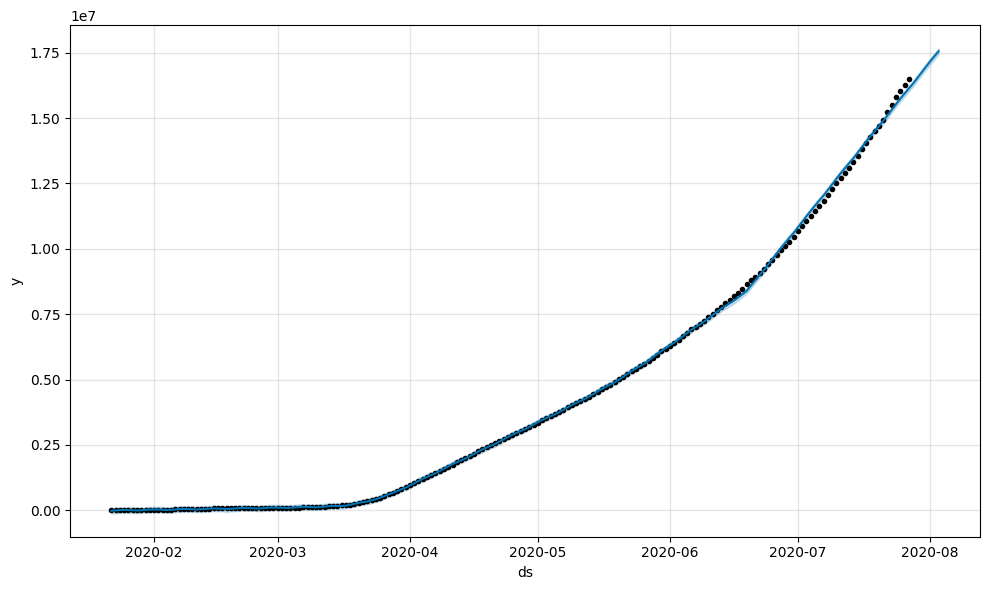

In [151]:
fig= model.plot(forecast)
fig.show()

##plot forecast componenets( trend, weekly seasonality trend)

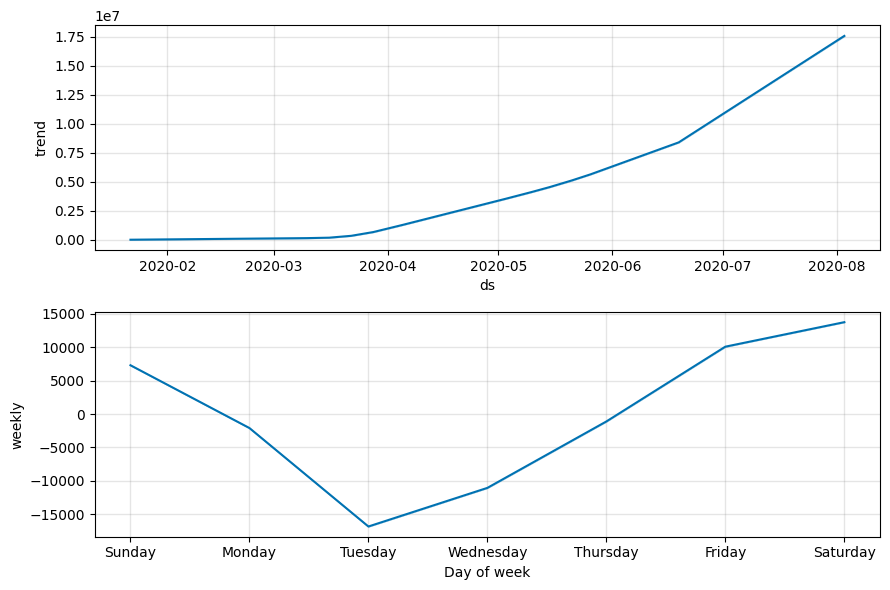

In [152]:
fig2= model.plot_components(forecast)
fig2.show()

##forecast values

In [155]:
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7))

            ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  1.632021e+07  1.621060e+07  1.642533e+07
189 2020-07-29  1.652998e+07  1.643225e+07  1.663683e+07
190 2020-07-30  1.674392e+07  1.664104e+07  1.684834e+07
191 2020-07-31  1.695911e+07  1.684975e+07  1.707211e+07
192 2020-08-01  1.716677e+07  1.705418e+07  1.728136e+07
193 2020-08-02  1.736430e+07  1.724303e+07  1.747665e+07
194 2020-08-03  1.755889e+07  1.744745e+07  1.766654e+07


##india confirmed cases

In [157]:
prophet_df_india= india_daily.reset_index()[['Date','Confirmed']]
prophet_df_india= prophet_df_india.rename(columns={'Date':'ds','Confirmed':'y'})
prophet_df_india.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [158]:
model_india =Prophet()
model_india.fit(prophet_df_india)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##forecast next 7 days for india

In [159]:
future_india= model_india.make_future_dataframe(periods=7)
forecast_india= model_india.predict(future_india)

##plot forecast for india

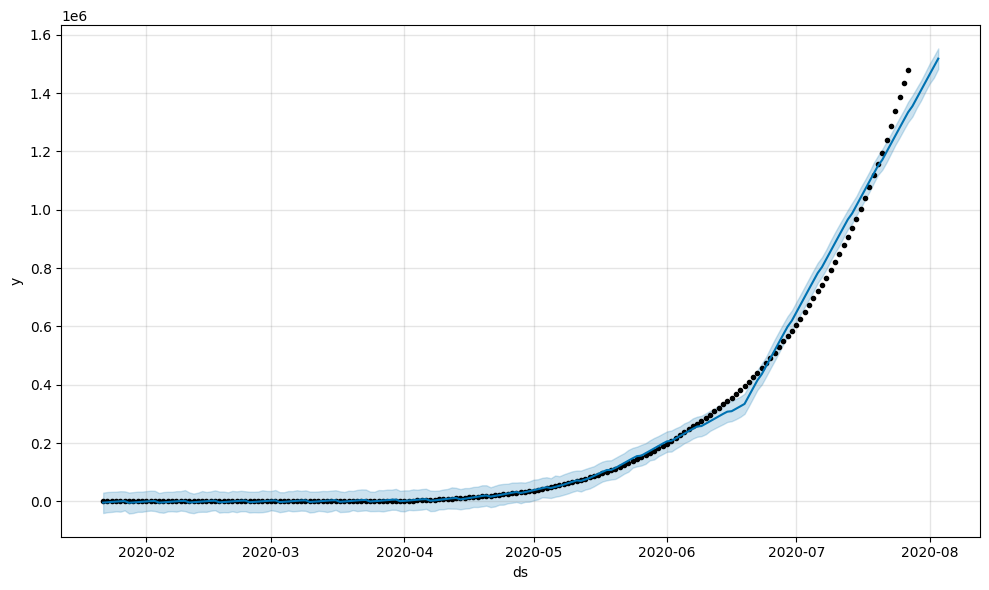

In [160]:
fig_india= model_india.plot(forecast_india)
fig_india.show()

##forecast components

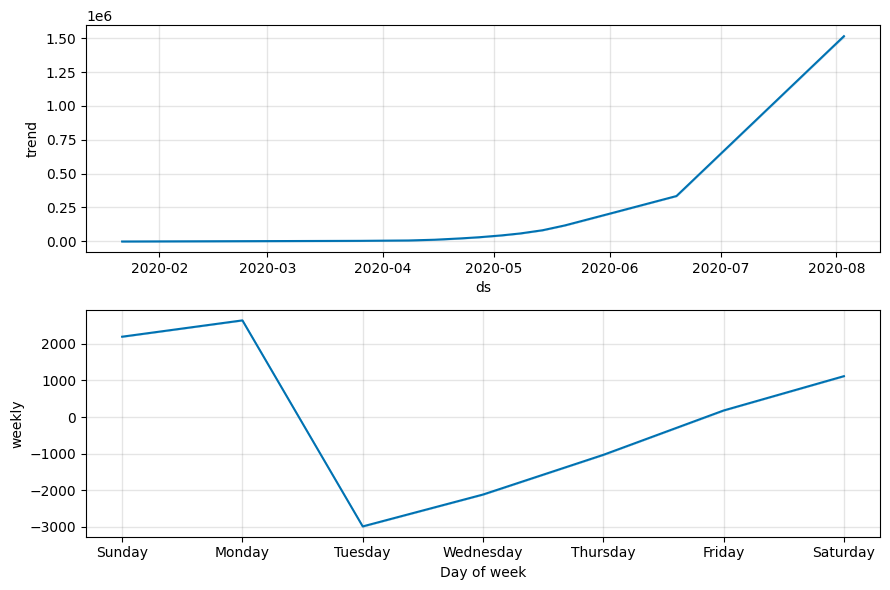

In [161]:
fig_india_comp= model_india.plot_components(forecast_india)
fig_india_comp.show()

##forecast values

In [162]:
print(forecast_india[['ds','yhat','yhat_lower','yhat_upper']].tail(7))

            ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  1.354797e+06  1.319183e+06  1.391965e+06
189 2020-07-29  1.381920e+06  1.349035e+06  1.417149e+06
190 2020-07-30  1.409255e+06  1.374205e+06  1.442063e+06
191 2020-07-31  1.436718e+06  1.404442e+06  1.470964e+06
192 2020-08-01  1.463907e+06  1.431987e+06  1.500588e+06
193 2020-08-02  1.491237e+06  1.452828e+06  1.525903e+06
194 2020-08-03  1.517934e+06  1.482408e+06  1.552910e+06


##visualize prophet predictions with plotly( combined vs Historical data)

In [163]:
fig= px.line(
    forecast,
    x='ds',
    y=['yhat','yhat_upper','yhat_lower'],
    title='global covid-19 confirmed cases: actual vs forecast'
)
fig.show()

##india cnfirmed cases: actual vs forecast

In [168]:
fig= px.line(
    forecast_india,
    x='ds',
    y=['yhat','yhat_upper','yhat_lower'],
    title='india covid-19 confirmed cases: actual vs forecast'
)
fig.show()

##Extended: plotly visualization for confirmed, deaths, recovered

##fit prophet

In [190]:
model=Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##forecast

In [172]:
future= model.make_future_dataframe(periods=7)
forecast= model.predict(future)

##plot with plotly

In [194]:
def prophet_forecast_plot(df,column, title_prefix):
  prophet_df= df.reset_index()[['Date',column]].rename(columns={'Date':'ds',column:'y'})
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=prophet_df['ds'],y=prophet_df['y'], mode='lines', name=f"actual{column}", line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=forecast['ds'],y=forecast['yhat'], mode='lines', name=f'predicted{column}', line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=forecast['ds'],y=forecast['yhat_upper'], mode='lines', line=dict(width=0), showlegend=False
))

fig.add_trace(go.Scatter(
    x=forecast['ds'],y=forecast['yhat_lower'],mode='lines',line=dict(width=0),
    fill='tonexty', fillcolor='rgba(255,0,0,0.2)', showlegend=False,
    name='Confidence interval'
))

fig.update_layout(
    title=f"{title_prefix} covid-19 {column}: actual vs forecast",
    xaxis_title="date",
    yaxis_title=f"{column} cases"
)
fig.show()
